In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
from mydrive.Codes.brown import Brown

In [ ]:
vocab, sentences = Brown().get_limited_vocab(vocab_size=200)
print("Vocab Size : {}".format(len(vocab)))
print("Corpus length : {}".format(len(sentences)))

Vocab Size : 201
Corpus length : 56610


In [ ]:
class NeuralNetwork:

    def __init__(self):
        pass

    def softmax(self, z):
        """
        ------------------------------------------------
        Description :
        Function to calculate the softmax function of a vector

        Input :
        z : numpy ndarray to apply softmax function to it

        Return:
        soft : numpy ndarray retrieved from softmax function
        ------------------------------------------------
        """

        z = z - z.max() # To prevent numerical overflow

        soft = np.exp(z) / np.sum(np.exp(z), axis = 1, keepdims = True)

        return soft



    def train(self, vocab, sentences, epochs=20, lr=0.01):
        """
        -----------------------------------------------------
        Description :
        Function to perform training of neural network 

        Input :
        vocab : The complete vocabulary
        sentences : list of sentence
        epochs : Number of training epochs to perform
        lr : learning rate for the neural network

        Output :
        W : a dict object containing the weights of the neural network
        losses : a list of losses encountered while training the neural network
        """
        start_idx = vocab["START"]
        end_idx = vocab["END"]
        V = len(vocab)
        D = 100
        W1 = np.random.randn(V, D) / np.sqrt(V)
        W2 = np.random.randn(D, V) / np.sqrt(V)

        W = {}
        losses = []

        for epoch in range(epochs):
            
            epoch_loss = []
            j = 0
            for sentence in sentences:
                sentence = [start_idx] + sentence + [end_idx]
                input_sentence = sentence[:len(sentence) - 1]
                output_sentence = sentence[1:]

                n = len(sentence)

                z1 = W1[input_sentence]
                a1 = np.tanh(z1)

                z2 = a1.dot(W2)
                a2 = self.softmax(z2)

                loss = -np.sum( np.log(a2[np.arange(n -1), output_sentence]) ) / (n - 1)

                losses.append(loss)

                dW2 = a2
                dW2[np.arange(n - 1), output_sentence] -= 1

                W2 = W2 - lr * a1.T.dot(dW2)

                dW1 = dW2.dot(W2.T) * (1 - a1 * a1)

                np.subtract.at(W1, input_sentence, lr*dW1)

                # epoch_loss.append(loss)

                if j % 100 == 0:
                    print("Epoch : {} Sentence : {}/{} Loss: {}".format(epoch, j, len(sentences), loss))
                
                j += 1

            # epoch_loss = np.array(epoch_loss).mean()

            # print("Epoch:{} , Loss : {}".format(epoch, epoch_loss))

        
        W = {
            "W1" : W1,
            "W2" : W2
        }

        return W, losses




In [ ]:
nnwts, losses = NeuralNetwork().train(vocab , sentences)

Streaming output truncated to the last 5000 lines.
Epoch : 8 Sentence : 46300/56610 Loss: 2.837510457694985
Epoch : 8 Sentence : 46400/56610 Loss: 3.0157784151506446
Epoch : 8 Sentence : 46500/56610 Loss: 1.8873446425874676
Epoch : 8 Sentence : 46600/56610 Loss: 2.8941152878417755
Epoch : 8 Sentence : 46700/56610 Loss: 2.9026417215438904
Epoch : 8 Sentence : 46800/56610 Loss: 2.91696056312724
Epoch : 8 Sentence : 46900/56610 Loss: 2.3576295756410452
Epoch : 8 Sentence : 47000/56610 Loss: 3.928286448604299
Epoch : 8 Sentence : 47100/56610 Loss: 3.9793550328033853
Epoch : 8 Sentence : 47200/56610 Loss: 2.4195003552524676
Epoch : 8 Sentence : 47300/56610 Loss: 2.6129146500181166
Epoch : 8 Sentence : 47400/56610 Loss: 1.9482842357615107
Epoch : 8 Sentence : 47500/56610 Loss: 2.6078751771552273
Epoch : 8 Sentence : 47600/56610 Loss: 2.841380786679272
Epoch : 8 Sentence : 47700/56610 Loss: 2.113244384363455
Epoch : 8 Sentence : 47800/56610 Loss: 1.7357673028878498
Epoch : 8 Sentence : 47900/

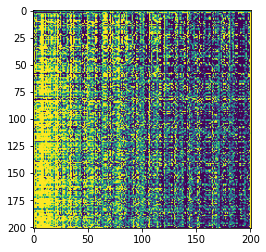

In [ ]:
plt.imshow(np.tanh(nnwts["W1"].dot(nnwts["W2"])))

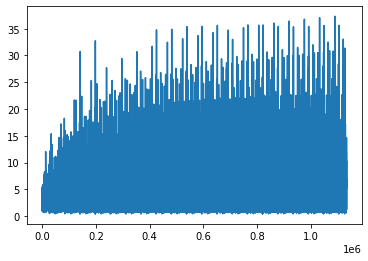

In [ ]:
plt.plot(losses)
plt.show()